# Exporatory Data Analysis for Online Shoppers Intention

The research question that we are attempting to answer with our analysis is a predictive question, and is stated as follows:

> Given clickstream and session data of a user who visits an e-commerce website, can we predict whether or not that visitor will make a purchase?

In [1]:
import pandas as pd
import numpy as np
import os
import pathlib
import altair as alt
from sklearn.model_selection import train_test_split

In [2]:
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
raw_data = pd.read_csv('../data/raw/online_shoppers_intention.csv')

In [4]:
numeric_cols = raw_data.select_dtypes('number').columns.tolist()
category_cols = ['Month', 'VisitorType', 'Weekend']
target_var = 'Revenue'

In [5]:
raw_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
raw_data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


## Description of Target Label and Features

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### High level description of features

* The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period
* There are 9 numeric features, and 9 categorical features
* The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.

| Feature                 | Type                                                                                                       | Description |
|-------------------------|------------------------------------------------------------------------------------------------------------|-------------|
| Revenue                 | TARGET LABEL: Whether the visitor made a purchase (True) or not (False)                                    | Boolean     |
| Administrative          | Number of Administrative webpages visited by visitor during the browsing session                           | Numeric     |
| Administrative_Duration | Total time spent on Administrative webpages                                                                | Numeric     |
| Informational           | Number of Informational webpages visited by visitor during the browsing session                            | Numeric     |
| Informational_Duration  | Total time spent on Informational webpages                                                                 | Numeric     |
| ProductRelated          | Number of ProductRelated webpages visited by visitor during the browsing session                           | Numeric     |
| ProductRelated_Duration | Total time spent on ProductRelated webpages                                                                | Numeric     |
| BounceRates             | Average bounce rate of the pages visited by the user. [Google Analytics: Bounce rate](https://support.google.com/analytics/answer/1009409?hl=en)                 | Numeric     |
| ExitRates               | Average exit rate of the pages visited by the user. [Google Analytics: Exit rate](https://support.google.com/analytics/answer/2525491?hl=en&ref_topic=6156780) | Numeric     |
| PageValues              | Average page value of the pages visited by the user. [Google Analytics: Page value](https://support.google.com/analytics/answer/2695658?hl=en)                  | Numeric     |
| SpecialDay              | Closeness of the visiting site to a specific special day (e.g. Mother's Day)                               | Ordinal?    |
| Month                   | The month of the visit.                                                                                    | Categorical |
| OperatingSystems        | Operating system of the visitor.                                                                           | Categorical |
| Browser                 | Browser of the visitor.                                                                                    | Categorical |
| Region                  | Region of the visitor.                                                                                     | Categorical |
| TrafficType             | The type of traffic the brought the visitor to the website.                                                | Categorical |

## Train test split

TODO: Add this once we have discussed how to split the data (we should be doing split before EDA I think, but let me know if I'm wrong)

### Check data for missing values and the mean/max/min/standard deviation of the different columns

In [8]:
raw_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
raw_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Visualize target variable 

In [10]:
raw_data[target_var].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

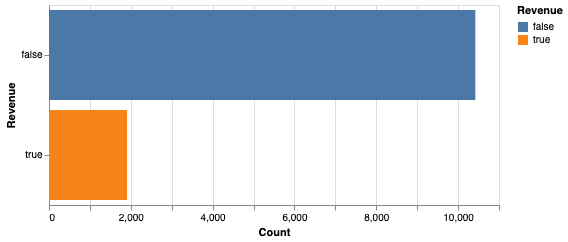

In [11]:
# nico note: I added colour again
alt.Chart(raw_data).mark_bar().encode(
     y=alt.Y(target_var, type='nominal'),
     x=alt.X('count()', title='Count'),
     color=alt.Color("Revenue")
).properties(
    width=450,
    height=200
)

### Visualize distributions of the numeric variables

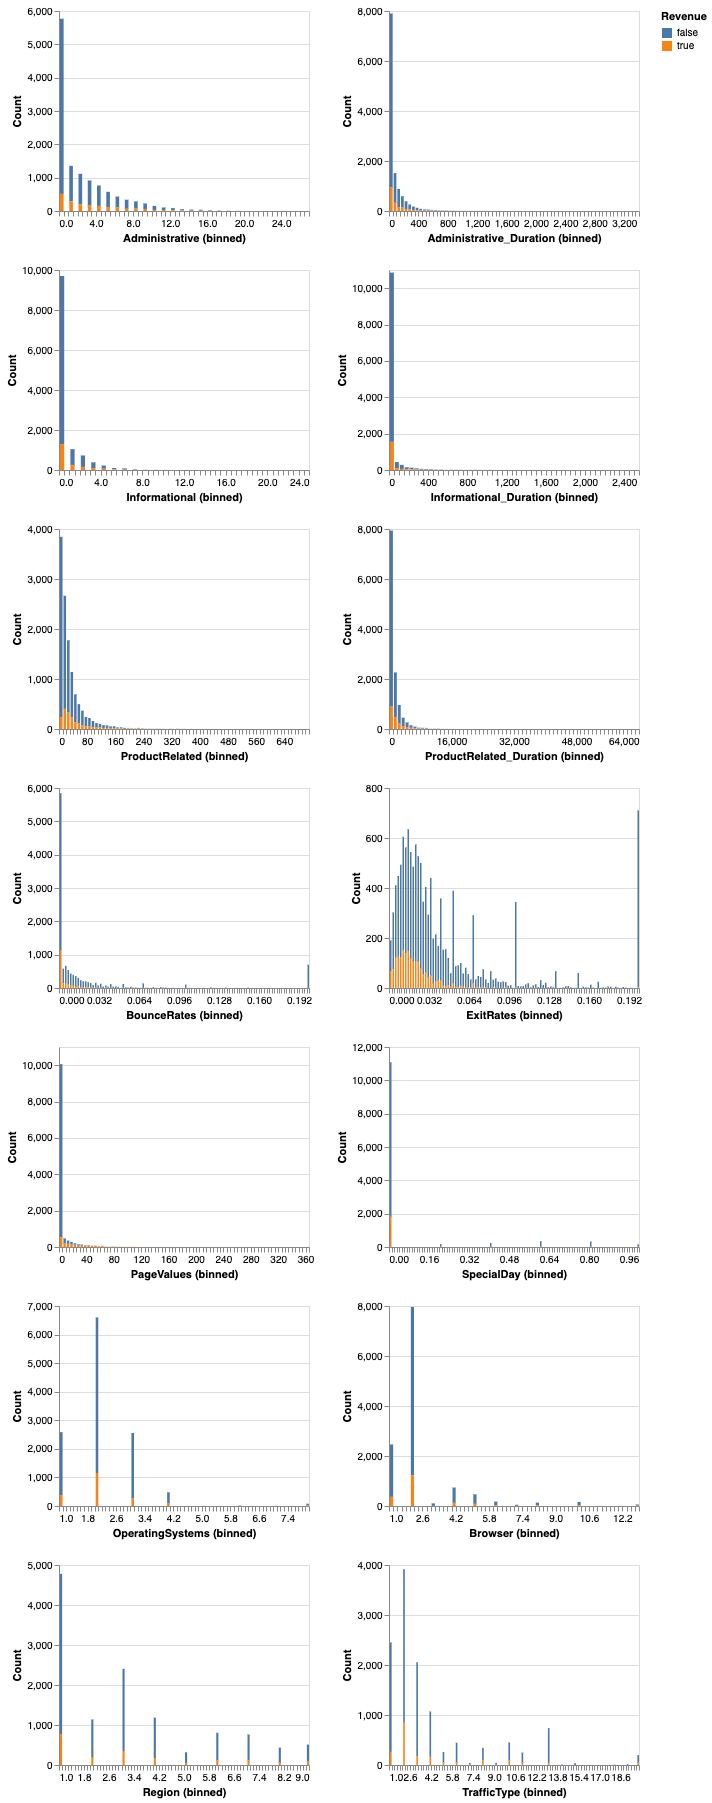

In [12]:
# nico note to team: I added colour by revenue
alt.Chart(raw_data).mark_bar().encode(
     alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=100)),
     alt.Y('count()', title='Count'),
     alt.Color("Revenue")
).properties(
    width=250,
    height=200
).repeat(
    numeric_cols,
    columns=2
)

* While average `BounceRates` remains low, there are a handful of sessions with the maximum 20% `BounceRates`. Do these sessions have low views?

In [13]:
raw_data.query('BounceRates > 0.175').describe()[numeric_cols]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,707.000000,707.0,707.000000,707.0,707.000000,707.000000,707.000000,707.000000,707.0,707.000000,707.000000,707.000000,707.000000,707.000000
mean,0.021216,0.0,0.008487,0.0,1.407355,2.681400,0.199802,0.199851,0.0,0.064498,2.166902,2.367751,3.222065,4.694484
std,0.153716,0.0,0.091796,0.0,1.195294,53.141273,0.001985,0.001617,0.0,0.198646,1.178361,1.983067,2.466815,4.933554
min,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.176923,0.171429,0.0,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.200000,0.200000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.200000,0.200000,0.0,0.000000,2.000000,2.000000,3.000000,3.000000
75%,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.200000,0.200000,0.0,0.000000,3.000000,2.000000,4.000000,6.000000
max,2.000000,0.0,1.000000,0.0,13.000000,1377.250000,0.200000,0.200000,0.0,1.000000,8.000000,13.000000,9.000000,20.000000


In [14]:
raw_data.query('BounceRates <= 0.175').describe()[numeric_cols]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000,11623.00000,11623.000000
mean,2.454702,85.734618,0.533683,36.569274,33.576013,1267.256745,0.011388,0.033536,6.247488,0.061241,2.121397,2.356448,3.14282,4.031575
std,3.371123,180.915518,1.301964,144.702446,45.154997,1947.571229,0.021405,0.030314,19.066279,0.198941,0.892506,1.699865,2.39760,3.960281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,237.708333,0.000000,0.013429,0.000000,0.000000,2.000000,2.000000,1.00000,2.000000
50%,1.000000,15.800000,0.000000,0.000000,20.000000,666.100000,0.001891,0.024225,0.000000,0.000000,2.000000,2.000000,3.00000,2.000000
75%,4.000000,100.000000,0.000000,0.000000,40.000000,1552.085714,0.013333,0.042315,0.000000,0.000000,3.000000,2.000000,4.00000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.175000,0.200000,361.763742,1.000000,8.000000,13.000000,9.00000,20.000000


<AxesSubplot:>

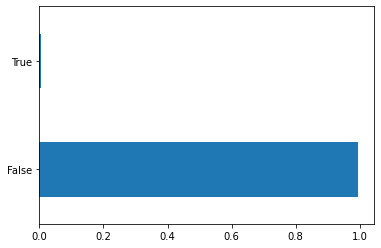

In [15]:
raw_data.query('BounceRates > 0.175')['Revenue'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

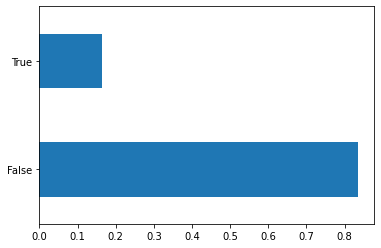

In [16]:
raw_data.query('BounceRates <= 0.175')['Revenue'].value_counts(normalize=True).plot(kind='barh')

* Seems like high `BounceRates` is also associated with high `ExitRates`
* High `BounceRates` sessions also have less views/durations, less `PageValue`, and ultimately, less sales

### Visualize counts of the categorical variables

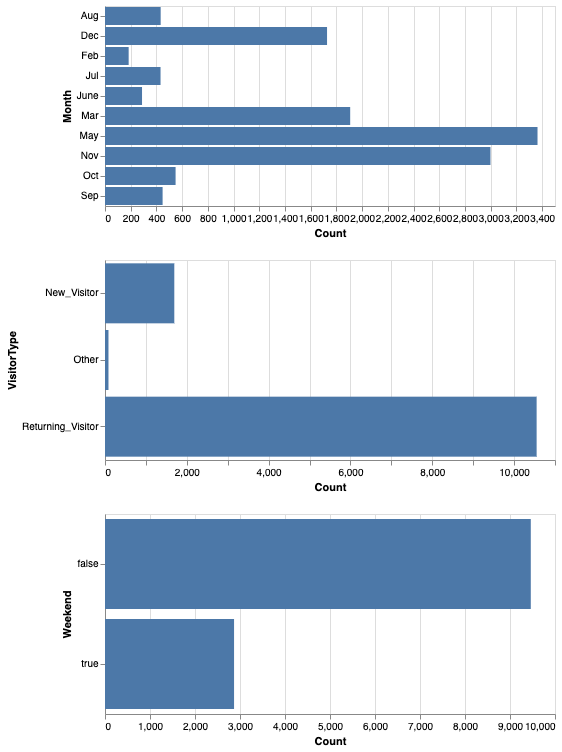

In [17]:
alt.Chart(raw_data).mark_bar().encode(
     y=alt.Y(alt.repeat(), type='nominal'),
     x=alt.X('count()', title='Count'),
).properties(
    width=450,
    height=200
).repeat(
    category_cols,
    columns=1
)

### Visualize correlations in the data

In [18]:
corr_matrix = raw_data.corr().reset_index().melt('index')
corr_matrix.columns = ['var1', 'var2', 'correlation']

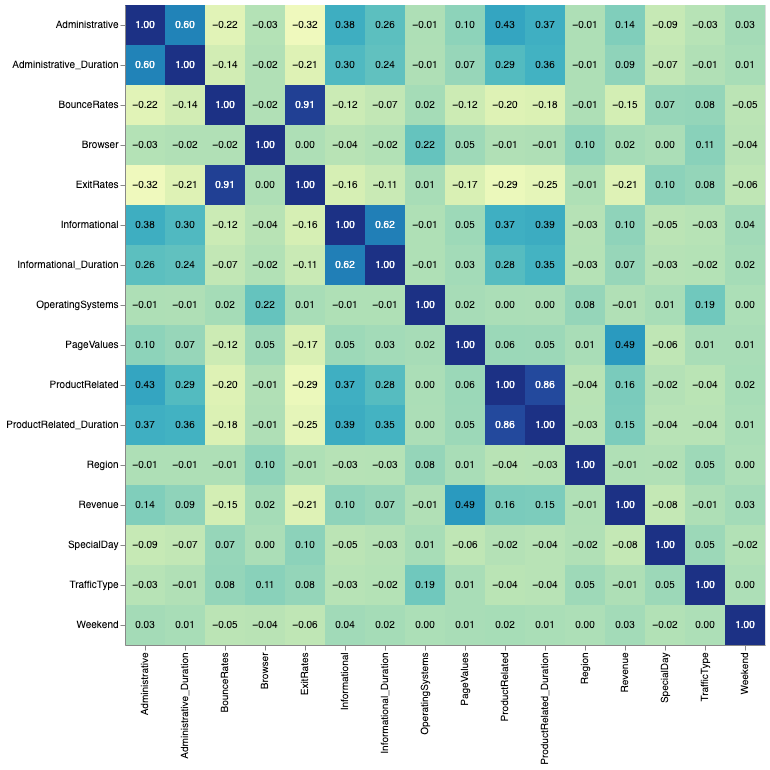

In [19]:
correl_plot = alt.Chart(corr_matrix).mark_rect().encode(
    x=alt.X('var1', title=None),
    y=alt.Y('var2', title=None),
    color=alt.Color('correlation', legend=None)
).properties(
    width=alt.Step(40),
    height=alt.Step(40)
)

correl_plot += correl_plot.mark_text(size=10).encode(
    text=alt.Text('correlation', format='.2f'),
    color=alt.condition(
        "datum.correlation > 0.5",
        alt.value('white'),
        alt.value('black')
    )
)

correl_plot
# correl_plot.transform_filter("datum.var1 < datum.var2")

* `BounceRates` are `ExitRates` are similar to each other
* Sessions with high BounceRates have less webpage interaction and less sales
* `PageValues` could be an important feature. It has positive correlation with `Revenue`, and is the most direct feature linking to `Revenue`

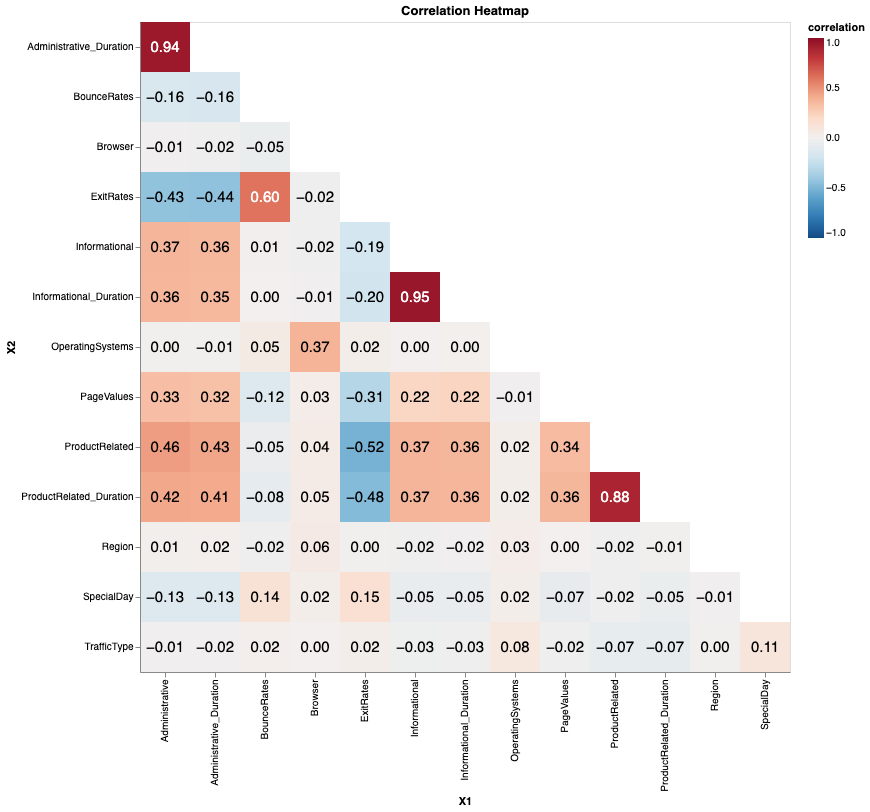

In [20]:
# nico note:
# alternative correlation heatmap I had made, just including here for reference
# we can pick which one to keep
corr_df = (
    raw_data.select_dtypes("number")
    .corr("spearman")
    .reset_index()
    .melt("index")
)

corr_df.columns = ['X1', 'X2', 'correlation']

base = alt.Chart(corr_df, title="Correlation Heatmap").transform_filter(
    alt.datum.X1 < alt.datum.X2
).encode(
    x='X1',
    y='X2',
).properties(
    width=alt.Step(50),
    height=alt.Step(50)
)

rects = base.mark_rect().encode(
    alt.Color('correlation', scale=alt.Scale(scheme="redblue", reverse=True, domain=(-1, 1)))
)

text = base.mark_text(
    size=15
).encode(
    text=alt.Text('correlation', format=".2f"),
    color=alt.condition(
        "datum.correlation > 0.5",
        alt.value('white'),
        alt.value('black')
    )
)

rects + text

In [21]:
### PageValues - the golden feature?

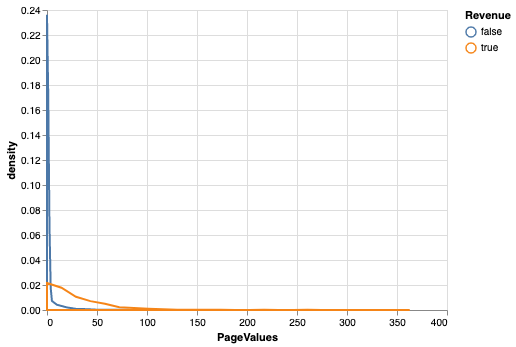

In [22]:
(alt.Chart(raw_data)
 .transform_density(
     'PageValues',
     groupby=['Revenue'],
     as_=['PageValues', 'density'])
 .mark_area(fill=None, strokeWidth=2).encode(
     alt.X('PageValues'),
     y='density:Q',
     stroke='Revenue'))

* As seen from the chart, having `PageValues` above 20 increases the likelihood of a purchase conversion
* However, there are some noisy outliers that might be worth removing

### Extreme outlier - Duration features

In [23]:
admin_d_outliers = set(raw_data.query("Administrative_Duration > 2000").index)
product_d_outliers = set(raw_data.query("ProductRelated_Duration > 20000").index)
info_d_outliers = set(raw_data.query("Informational_Duration > 2000").index)

# trying to find very obvious outliers, then can consider more formal analysis?
potential_outliers = admin_d_outliers.intersection(product_d_outliers).intersection(info_d_outliers)

# these all have very large admin, info, and product duration
raw_data.query("index in @potential_outliers")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5152,17,2629.253968,24,2050.433333,705,43171.23338,0.004851,0.015431,0.763829,0.0,May,2,2,1,14,Returning_Visitor,True,False
8071,5,3398.750000,6,2549.375000,449,63973.52223,0.000764,0.027701,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


### Extreme outlier - ProductRelated Features

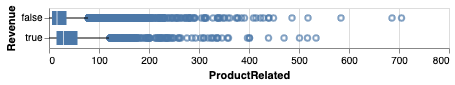

In [24]:
alt.Chart(raw_data).mark_boxplot().encode(
    y = 'Revenue',
    x = 'ProductRelated'
)

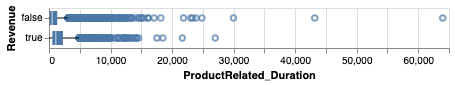

In [25]:
alt.Chart(raw_data).mark_boxplot().encode(
    y = 'Revenue',
    x = 'ProductRelated_Duration'
)

* Seems like higher interactions with ProductRelated pages are associated with more sales
* But the outlier looks more like noises. We can try to remove them

### Potential transformations

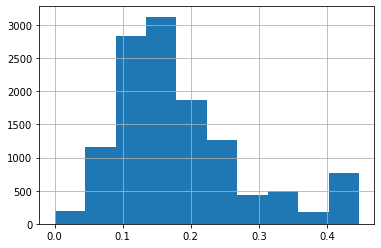

In [26]:
# exit rates is interesting features, square root transform makes it more normal
np.sqrt(raw_data["ExitRates"]).hist();

## Additional categorical charts - counts vs. target label

Nico note: These charts are similar to the ones Arijeet made above, to decide which ones to keep

In [27]:
def categorical_count_chart(df, target, col):
    chart = alt.Chart(
        df,
        title=f"Distribution of {col} feature"
    ).mark_bar().encode(
        alt.X(target, axis=None),
        alt.Y(f"count({target})"),
        alt.Color(target),
        alt.Column(col)
    )

    return chart

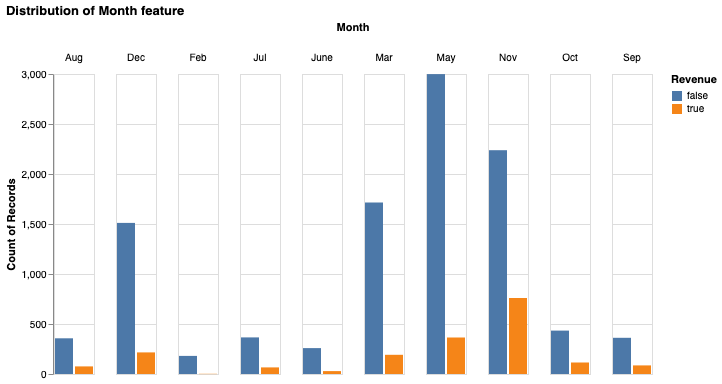

In [28]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "Month"
)

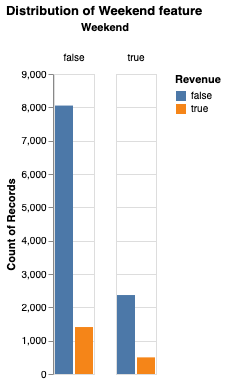

In [29]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "Weekend"
)

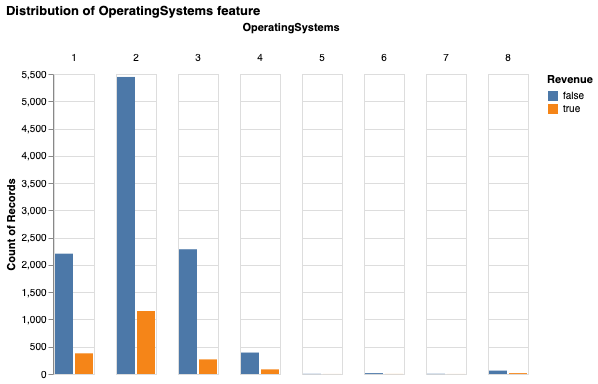

In [30]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "OperatingSystems"
)

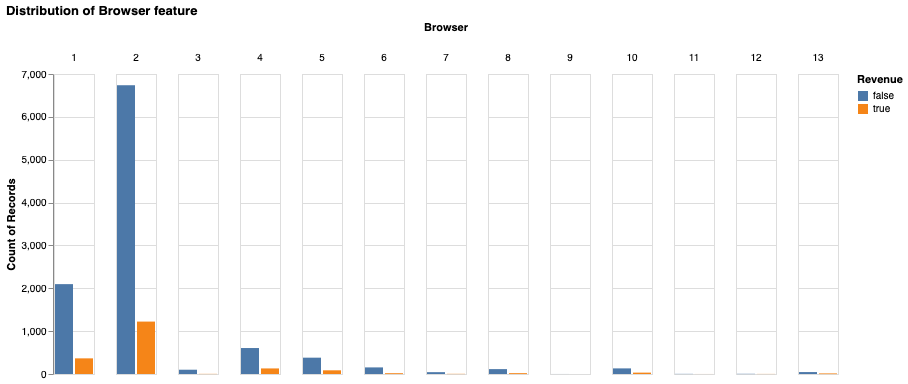

In [31]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "Browser"
)

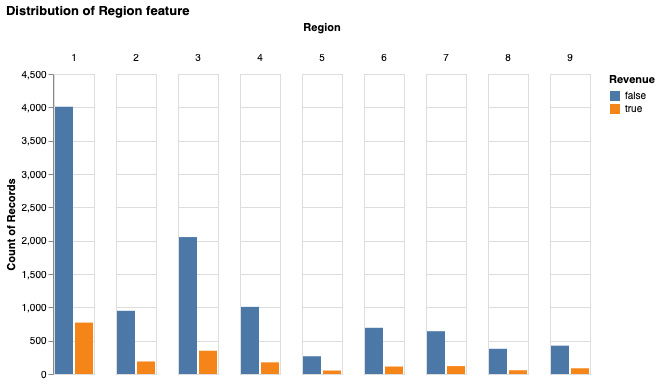

In [32]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "Region"
)

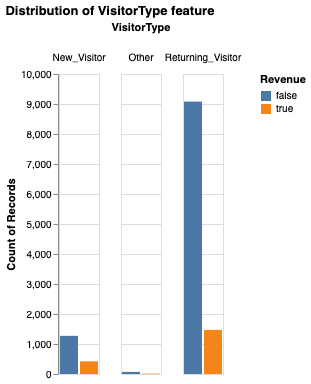

In [33]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "VisitorType"
)

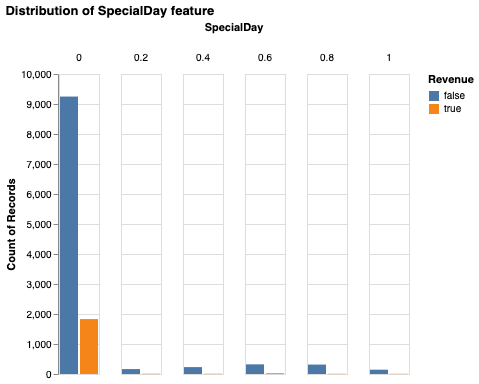

In [34]:
categorical_count_chart(
    raw_data,
    "Revenue",
    "SpecialDay"
)